# Mandelbrot set

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
plt.rcParams["figure.figsize"] = [24, 8]
plt.rcParams["figure.dpi"] = 100

The Mandelbrot set consists of the set of all complex numbers $c$ for which the function $f_c(z) = z^2 + c$ does not diverge when iterated from $0$.  We'll write a function in Python which takes a complex number $c$ and returns the function $f_c$.

In [2]:
def f(c):
    return lambda z: z**2 + c

For example, let's iterate the function $f_{(0.8+0.2i)}$ ten times:

In [18]:
fc = f(-0.3 + 0.4j)
z = 0 + 0j
for iteration in range(10):
    print(f"z_{iteration} = {z.real:0.3} + {z.imag:0.3}i")
    z = fc(z)

z_0 = 0.0 + 0.0i
z_1 = -0.3 + 0.4i
z_2 = -0.37 + 0.16i
z_3 = -0.189 + 0.282i
z_4 = -0.344 + 0.294i
z_5 = -0.268 + 0.198i
z_6 = -0.267 + 0.294i
z_7 = -0.315 + 0.243i
z_8 = -0.26 + 0.247i
z_9 = -0.293 + 0.272i


We can also plot this graphically:

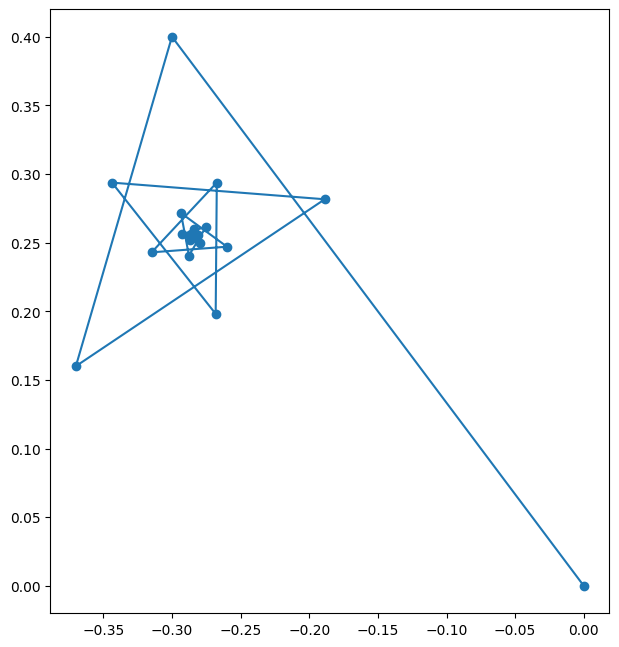

In [129]:
z = 0 + 0j
zs = []
for _ in range(50):
    zs.append(z)
    z = fc(z)
    
plt.plot([z.real for z in zs], [z.imag for z in zs], "-o")
plt.gca().set_aspect("equal")

To test if $f_c$ is diverging for a particular $c$ we can test the absolute value after a fixed set of iterations.  If the absolute value is ever greater than $2$ then the sequence is diverging.  If it's not greater than two then we can't be sure whether it will diverge or not yet.  Our function will return `True` if it's definitely diverging, or `False` otherwise:

In [81]:
def is_diverging(c, iterations):
    fc = f(c)
    z = 0 + 0j
    for _ in range(iterations):
        z = fc(z)
        if abs(z) > 2:
            return True
    
    return False

Let's write a function that plots a $40\times40$ grid representing complex numbers with the real parts from $-2$ to $2$ on the $x$-axis and imaginary parts $-2$ to $2$ on the $y$-axis:

In [82]:
def plot_mandelbrot(iterations, xmin=-2, xmax=2, ymin=-2, ymax=2):
    for y in range(ymax*10, ymin*10-1, -1):
        for x in range(xmin*10, xmax*10+1):
            c = complex(x/10, y/10)
            if is_diverging(c, iterations):
                print("  ", end="")
            else:
                print("x ", end="")
        print()

With just one iteration we get a circle:

In [36]:
plot_mandelbrot(1)

                                        x                                         
                            x x x x x x x x x x x x x                             
                        x x x x x x x x x x x x x x x x x                         
                    x x x x x x x x x x x x x x x x x x x x x                     
                x x x x x x x x x x x x x x x x x x x x x x x x x                 
              x x x x x x x x x x x x x x x x x x x x x x x x x x x               
            x x x x x x x x x x x x x x x x x x x x x x x x x x x x x             
          x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x           
        x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x         
        x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x         
      x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x       
      x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x       
    

And with two iterations an eliptical shape:

In [43]:
plot_mandelbrot(2)

                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                          x x x x x                                               
                  x x x x x x x x x x x x x                                       
              x x x x x x x x x x x x x x x x x                                   
            x x x x x x x x x x x x x x x x x x x                                 
        x x x x x x x x x x x x x x x x x x x x x x x                             
    

Now it starts to get more familiar:

In [37]:
plot_mandelbrot(3)

                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                              x x x x x x x                                       
                            x x x x x x x x x                                     
                        x x x x x x x x x x x x                                   
    

Now we'll "zoom in" on a smaller region:

In [39]:
plot_mandelbrot(4, xmin=-2, xmax=1, ymin=-1, ymax=1)

                                  x x x x                     
                                x x x x x x                   
                              x x x x x x x x x               
                          x x x x x x x x x x x x             
                      x x x x x x x x x x x x x x             
                x x x x x x x x x x x x x x x x x x           
            x x x x x x x x x x x x x x x x x x x x           
          x x x x x x x x x x x x x x x x x x x x x           
        x x x x x x x x x x x x x x x x x x x x x x           
      x x x x x x x x x x x x x x x x x x x x x x x           
x x x x x x x x x x x x x x x x x x x x x x x x x x           
      x x x x x x x x x x x x x x x x x x x x x x x           
        x x x x x x x x x x x x x x x x x x x x x x           
          x x x x x x x x x x x x x x x x x x x x x           
            x x x x x x x x x x x x x x x x x x x x           
                x x x x x x x x x x x x x x x x x x    

In [41]:
plot_mandelbrot(8, xmin=-2, xmax=1, ymin=-1, ymax=1)

                                      x x                     
                                    x x                       
                                    x x x                     
                                  x x x x x                   
                            x x x x x x x x x x x             
                            x x x x x x x x x x               
                          x x x x x x x x x x x x             
                x x x x x x x x x x x x x x x x x             
                x x x x x x x x x x x x x x x x x             
            x x x x x x x x x x x x x x x x x x               
x x x x x x x x x x x x x x x x x x x x x x x x               
            x x x x x x x x x x x x x x x x x x               
                x x x x x x x x x x x x x x x x x             
                x x x x x x x x x x x x x x x x x             
                          x x x x x x x x x x x x             
                            x x x x x x x x x x        

In [43]:
plot_mandelbrot(16, xmin=-2, xmax=1, ymin=-1, ymax=1)

                                        x                     
                                      x                       
                                    x x x                     
                                    x x                       
                              x x x x x x x                   
                              x x x x x x x x x               
                            x x x x x x x x x x               
                    x     x x x x x x x x x x x               
                x x x x   x x x x x x x x x x x x             
                x x x x x x x x x x x x x x x x               
x x x x x x x x x x x x x x x x x x x x x x x                 
                x x x x x x x x x x x x x x x x               
                x x x x   x x x x x x x x x x x x             
                    x     x x x x x x x x x x x               
                            x x x x x x x x x x               
                              x x x x x x x x x        

In [44]:
plot_mandelbrot(32, xmin=-2, xmax=1, ymin=-1, ymax=1)

                                        x                     
                                                              
                                    x x                       
                                    x x                       
                              x   x x x x x                   
                              x x x x x x x x x               
                            x x x x x x x x x x               
                    x       x x x x x x x x x x               
                  x x x   x x x x x x x x x x x               
                x x x x x x x x x x x x x x x x               
x x x x x x x x x x x x x x x x x x x x x x x                 
                x x x x x x x x x x x x x x x x               
                  x x x   x x x x x x x x x x x               
                    x       x x x x x x x x x x               
                            x x x x x x x x x x               
                              x x x x x x x x x        

At this resolution, 32 iterations is enough.

Let's plot it at higher resolution using matplotlib:

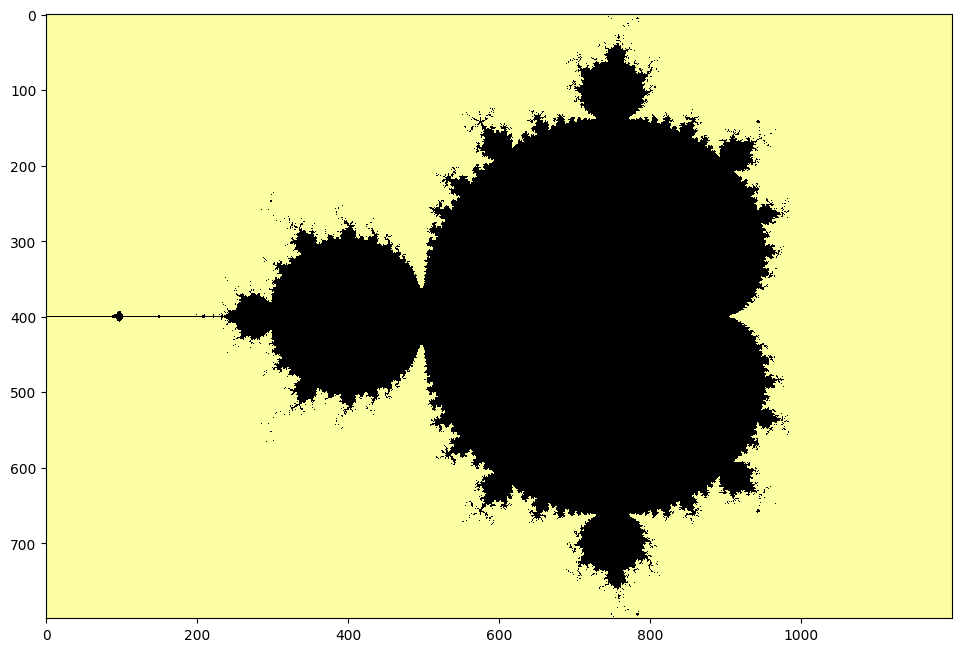

In [128]:
def plot_mandelbrot(
    iterations,
    diverge_check,
    real_min=-2,
    real_max=1,
    imag_min=-1,
    imag_max=1,
    x_resolution=1200
):

    real_range = real_max - real_min
    imag_range = imag_max - imag_min
    aspect_ratio = real_range/imag_range
    y_resolution = int(x_resolution/aspect_ratio)
    img = np.empty(
        [y_resolution, x_resolution], 
        dtype=np.float32
    )

    for y in range(y_resolution):
        for x in range(x_resolution):
            real_part = real_min + (x/x_resolution)*real_range
            imag_part = imag_max - (y/y_resolution)*imag_range
            c = complex(real_part, imag_part)
            img[y, x] = np.float32(diverge_check(c, iterations))

    plt.imshow(img, cmap=plt.get_cmap("inferno"))

plot_mandelbrot(32, is_diverging)

This one will take a while to render:

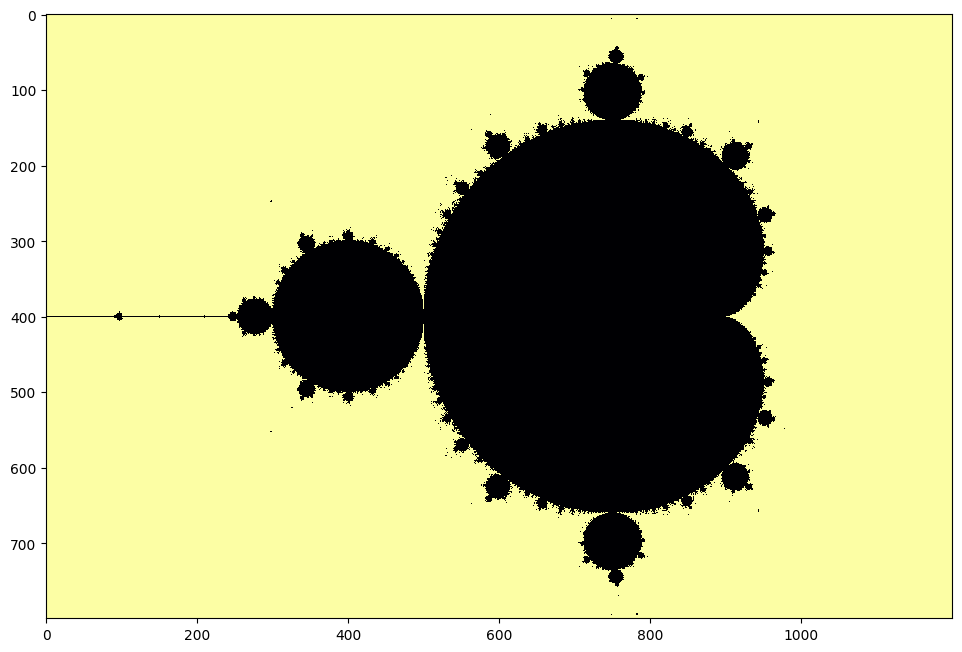

In [127]:
plot_mandelbrot(128, is_diverging)

Instead of just returning true or false from our `is_diverging` function, we could return the number of iterations it took before the absolute value was greater than two, or zero if it didn't diverge yet:

In [94]:
def is_diverging_n(c, iterations):
    fc = f(c)
    z = 0 + 0j
    for iteration in range(iterations):
        z = fc(z)
        if abs(z) > 2:
            return iteration + 1
    
    return 0

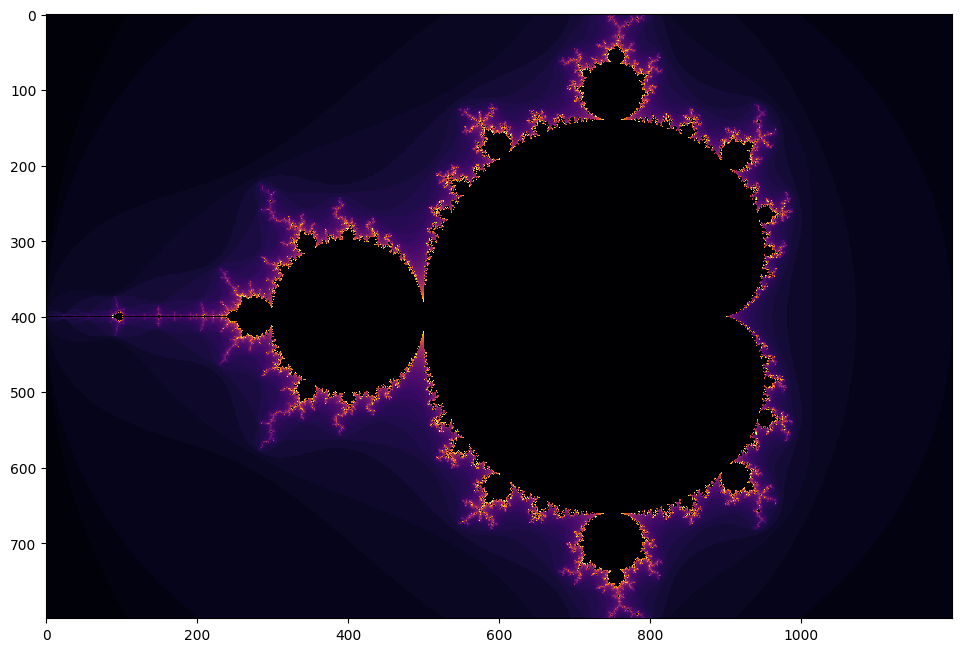

In [126]:
plot_mandelbrot(64, is_diverging_n)

And now we can begin to zoom in!

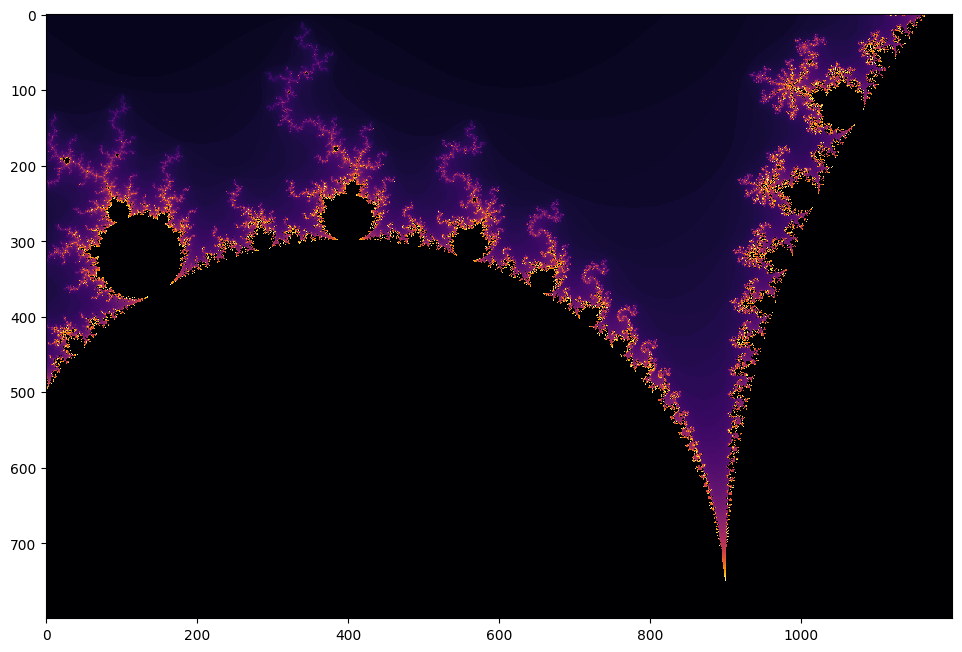

In [125]:
plot_mandelbrot(128, is_diverging_n, real_min=-1.2, real_max=-0.6, imag_min=0.0, imag_max=0.4)

It gets pretty slow, so probably best to use a proper mandelbrot explorer to zoom in further.